In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/no_teflon/s3mmp15mm/'
files = [data_dir+'flex.kr83m.1.nexus.h5', data_dir+'flex.kr83m.2.nexus.h5', data_dir+'flex.kr83m.3.nexus.h5']
#test_file = ["/Users/taylorcontreras/Development/Research/trackingplane/s1mmp1mm/flex.kr83m.25.nexus.h5"]
test_file = ["/Users/taylorcontreras/Development/Research/trackingplane/data/highenergy/no_teflon/s3mmp15mm/flex.kr83m.1.nexus.h5"]
config = pd.read_hdf(test_file[0], "MC/configuration")
config

,param_key,param_value
0,event_type,other
1,num_events,10
2,saved_events,10
3,interacting_events,0
4,PmtR11410_binning,0.025000 mus
...,...,...
72,/event/verbose,0
73,/tracking/verbose,0
74,/nexus/random_seed,2
75,/nexus/persistency/start_id,10


In [3]:
sns_response = pd.read_hdf(test_file[0], 'MC/sns_response')
sns_positions = pd.read_hdf(test_file[0], 'MC/sns_positions')
sns_positions = sns_positions.drop_duplicates(subset='sensor_id')
sns_positions

,sensor_id,sensor_name,x,y,z
0,42,PmtR11410,437.500000,108.300003,1468.699951
1,14,PmtR11410,-187.540558,108.229767,1468.699951
2,5,PmtR11410,62.500000,-108.253174,1468.699951
3,7,PmtR11410,125.000000,216.506348,1468.699951
4,45,PmtR11410,-437.500000,-108.300003,1468.699951
...,...,...,...,...,...
3363,2006,TP_SiPM,322.500000,-157.500000,-23.301001
3364,4261,TP_SiPM,112.500000,442.500000,-23.301001
3365,3863,TP_SiPM,352.500000,292.500000,-23.301001
3366,1377,TP_SiPM,142.500000,-322.500000,-23.301001


In [4]:
sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]

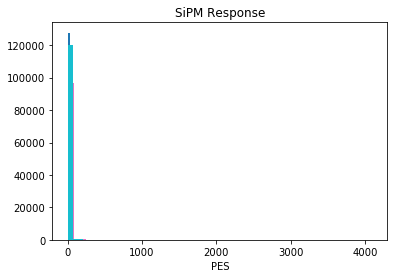

In [5]:
for _, grp in sipm_response.groupby('event_id'):
    plt.hist(grp.charge, bins=50)
plt.title('SiPM Response')
plt.xlabel("PES")
plt.show()

In [6]:
cuts = np.linspace(0, 50, 50)
for _, grp in sipm_response.groupby('event_id'):
    print(len(grp[grp.charge > 30]))

2635
2030
2921
2316
2571
2112
2376
825
1031
2494


In [7]:
num_sat_by_cut = []
for cut in cuts:
    sat_sipms = sipm_response.groupby('event_id').apply(
        lambda grp: len(grp[grp.charge > cut])).values.mean()
    num_sat_by_cut.append(sat_sipms)

In [8]:
sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]
len(sipm_positions)

3308

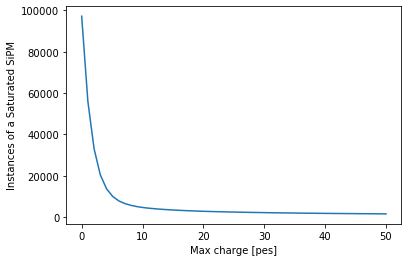

In [9]:
plt.plot(cuts, num_sat_by_cut)
plt.xlabel('Max charge [pes]')
plt.ylabel('Instances of a Saturated SiPM')
plt.show()

In [10]:
max_charges = sipm_response.groupby('event_id').apply(lambda grp: grp.charge.max())
num_events_sat = []
big_cuts = np.linspace(0, 5000, 50)
for cut in big_cuts:
    num_events_sat.append(len(max_charges[max_charges.values > cut]))

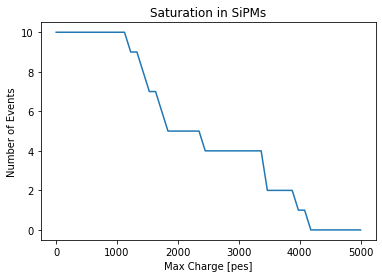

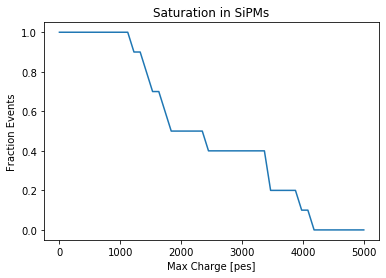

In [11]:
plt.plot(big_cuts, num_events_sat)
plt.xlabel('Max Charge [pes]')
plt.ylabel('Number of Events')
plt.title('Saturation in SiPMs')
plt.show()

plt.plot(big_cuts, np.array(num_events_sat)/num_events_sat[0])
plt.xlabel('Max Charge [pes]')
plt.ylabel('Fraction Events')
plt.title('Saturation in SiPMs')
plt.show()

In [12]:
for _, grp in sipm_response.groupby('event_id'):
    print(grp.charge.sum())

789638
580867
794429
796317
795297
633365
795089
257540
326235
791648


In [13]:
total_charge = sipm_response.groupby('event_id').apply(lambda grp: grp.charge.sum())
energy_loss_by_cut = []
for cut in big_cuts:
    total_charge_wcut = (sipm_response.groupby('event_id').apply(lambda grp: grp[grp.charge<cut].charge-cut).sum())
    energy_loss_by_cut.append((total_charge_wcut / total_charge).mean())

Text(0, 0.5, 'Fraction of total energy without Max charge')

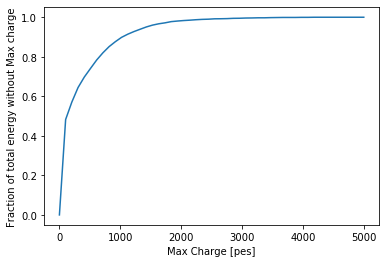

In [14]:
plt.plot(big_cuts, energy_loss_by_cut)
plt.xlabel('Max Charge [pes]')
plt.ylabel('Fraction of total energy without Max charge')

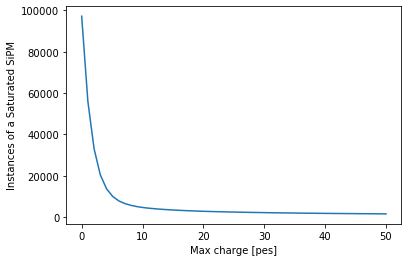

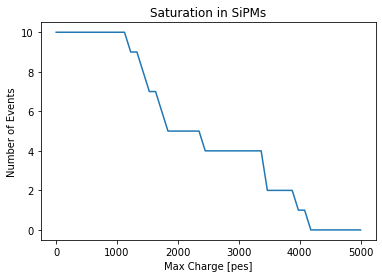

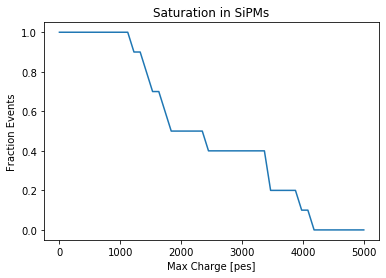

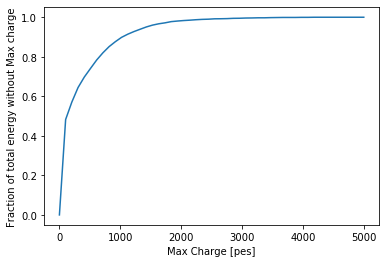

In [15]:
# With multiple files
cuts = np.linspace(0, 50, 50)
big_cuts = np.linspace(0, 5000, 50)
num_sat_by_cut = []
num_events_sat = []
energy_loss_by_cut = []
for file in files:
    sns_response = pd.read_hdf(test_file[0], 'MC/sns_response')
    sns_positions = pd.read_hdf(test_file[0], 'MC/sns_positions')
    sns_positions = sns_positions.drop_duplicates(subset='sensor_id')
    
    sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
    sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
    
    this_num_sat_by_cut = []
    for cut in cuts:
        sat_sipms = sipm_response.groupby('event_id').apply(
            lambda grp: len(grp[grp.charge > cut])).values.mean()
        this_num_sat_by_cut.append(sat_sipms)
    num_sat_by_cut.append(this_num_sat_by_cut)
    
    max_charges = sipm_response.groupby('event_id').apply(lambda grp: grp.charge.max())
    total_charge = sipm_response.groupby('event_id').apply(lambda grp: grp.charge.sum())
    this_num_events_sat = []
    this_energy_loss_by_cut = []
    for cut in big_cuts:
        this_num_events_sat.append(len(max_charges[max_charges.values > cut]))
        total_charge_wcut = sipm_response.groupby('event_id').apply(lambda grp: grp[grp.charge<cut].charge.sum())
        this_energy_loss_by_cut.append((total_charge_wcut / total_charge).mean())
    num_events_sat.append(this_num_events_sat)
    energy_loss_by_cut.append(this_energy_loss_by_cut)
    
num_sat_by_cut = np.array(num_sat_by_cut).sum(axis=0)/len(files)
num_events_sat = np.array(num_events_sat).sum(axis=0)/len(files)
energy_loss_by_cut = np.array(energy_loss_by_cut).sum(axis=0)/len(files)

plt.plot(cuts, num_sat_by_cut)
plt.xlabel('Max charge [pes]')
plt.ylabel('Instances of a Saturated SiPM')
plt.show()

plt.plot(big_cuts, num_events_sat)
plt.xlabel('Max Charge [pes]')
plt.ylabel('Number of Events')
plt.title('Saturation in SiPMs')
plt.show()

plt.plot(big_cuts, np.array(num_events_sat)/num_events_sat[0])
plt.xlabel('Max Charge [pes]')
plt.ylabel('Fraction Events')
plt.title('Saturation in SiPMs')
plt.show()

plt.plot(big_cuts, energy_loss_by_cut)
plt.xlabel('Max Charge [pes]')
plt.ylabel('Fraction of total energy without Max charge')
plt.show()

<ErrorbarContainer object of 3 artists>

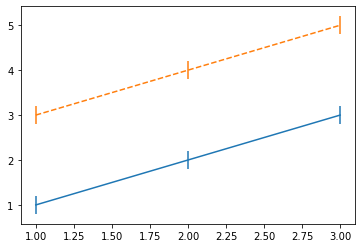

In [16]:
x = [1,2,3]
y = [1,2,3]
y2 = [3,4,5]
yerr = [.2,.2,.2]
plt.errorbar(x, y, yerr, linestyle='-')
plt.errorbar(x,y2,yerr, linestyle='--')

In [78]:
sat_response = sipm_response[['event_id', 'charge']][sipm_response.charge > cut]
sat_response.loc[:,('charge')] = sat_response.charge - cut
sat_response = sat_response.groupby('event_id').agg({"charge":"sum"})
total_charge = sipm_response[['event_id', 'charge']].groupby('event_id').agg({'charge':'sum'})
(sat_response / total_charge).mean()
#this = sipm_response[['event_id', 'charge']].groupby('event_id').apply(lambda grp: grp[grp.charge > cut])
#this.charge = this.charge - cut
#this #this.groupby('event_id').apply(lambda grp: grp.charge.sum())

charge    0.520261
dtype: float64

In [36]:
this

event_id  sensor_id  time_bin  charge
event_id                                               
10       142648         10       1977       889       2
         217815         10       2036       909       8
         217816         10       2036       910       1
         148410         10       2037       888       2
         148411         10       2037       889       1
...                    ...        ...       ...     ...
19       1886297        19       3691       174      12
         1827162        19       3692       192       7
         1827142        19       3692       172       7
         1827161        19       3692       191       7
         1827160        19       3692       190       1

[21311 rows x 4 columns]